In [1]:
import pandas as pd

df = pd.read_csv('data/Advertising.csv')

In [2]:
df.drop(columns=['Radio', 'Newspaper'], inplace=True)

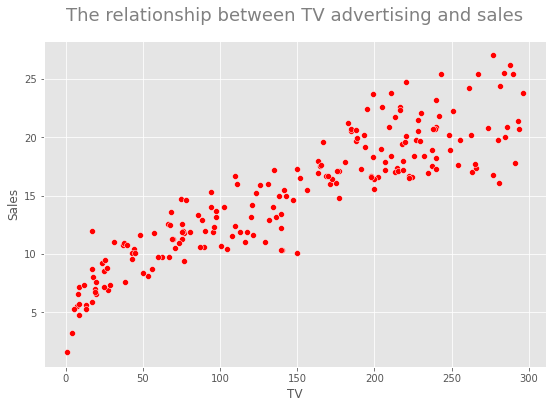

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='TV', y='Sales', data=df, ax=ax, color='red')

ax.set_title('The relationship between TV advertising and sales', pad=20, size=18, color='gray')

plt.savefig('img_output/scikit_scaterplot.png')

In [4]:
m = df['Sales'].values.size

In [5]:
import numpy as np

X = np.append(np.ones((m, 1)), df['TV'].values.reshape(m, 1), axis=1)

In [6]:
X.shape

(200, 2)

In [7]:
y = df['Sales'].values.reshape(m, 1)

In [8]:
theta = np.zeros((2, 1))

In [9]:
theta.shape

(2, 1)

## #1 Define the dataset $x$ and $y$

In [10]:
x_data = df[['TV']].values
y_data = df['Sales'].values

In [11]:
print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)


## #2 Split the dataset into a Training Set and a Testing Set

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state = 1)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


## #3 Create and fit (train) the Model

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

## #4 Get the Gradient and Intercept of the Linear Regression Line

Value of $\theta_{0}$

In [16]:
model.intercept_

6.902718095764663

Value of $\theta_{1}$

In [17]:
model.coef_

array([0.05565473])

## #5 Make Predictions

In [18]:
y_pred = model.predict(x_test)

In [19]:
dic = {'Sales (Actual)': y_test, 'Sales (Predicted)': y_pred}
df_result = pd.DataFrame(dic)
df_result.head(10)

,Sales (Actual),Sales (Predicted)
0,23.8,18.634735
1,16.6,18.172801
2,11.9,12.228876
3,19.8,22.497173
4,17.6,21.027889
5,25.5,22.686399
6,16.9,15.991135
7,17.9,16.965093
8,10.5,10.831942
9,17.1,18.890747


In [20]:
model.predict([[30]])

array([8.57235999])

In [21]:
model.intercept_ + (model.coef_ * 30)

array([8.57235999])

#### Show the Model and Applied to All the Data

c:\users\rohman\documents\pyenvironment\python-3.7.9-all-packages\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


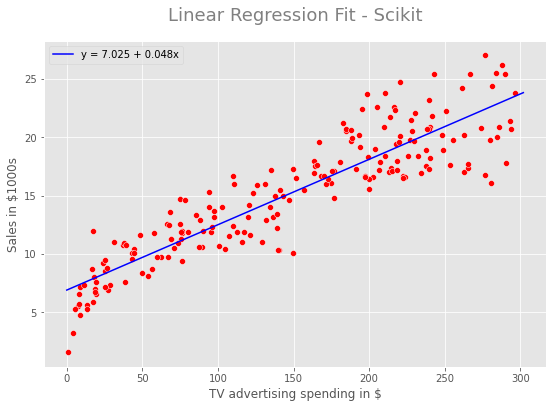

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax, color='red')

# Create random data based on theta and x value
theta = np.zeros((2, 1))
theta[0, 0] = model.intercept_
theta[1, 0] = model.coef_
a = np.round(theta, 3)
x_value = np.array(range(0, 303))
y_value = a[0, 0] + (a[1, 0] * x_value)


sns.lineplot(x_value, y_value, ax=ax, label='y = 7.025 + 0.048x', color='blue')

ax.set_title('Linear Regression Fit - Scikit', pad=20, size=18, color='gray')
ax.set_xlabel('TV advertising spending in $')
ax.set_ylabel('Sales in $1000s')
ax.legend(loc='upper left')
plt.savefig('img_output/scikit_linear_regression_fit.png')

## #6 Evaluate the Model Performance

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

R_squared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('R^2:', np.round(R_squared, 2))
print('RMSE: ', np.round(RMSE, 2))

R^2: 0.79
RMSE:  2.26


#### Plot the Predicted Sales compared with the Real Sales

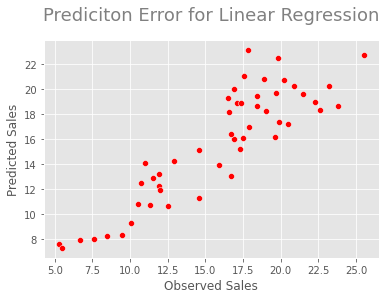

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), ax=ax, color='red')

ax.set_title('Prediciton Error for Linear Regression', pad=20, size=18, color='gray')
ax.set_xlabel('Observed Sales')
ax.set_ylabel('Predicted Sales')
plt.savefig('img_output/scikit_prediction_error.png')

#### Calculate the Residual and Analyze the Distribution

c:\users\rohman\documents\pyenvironment\python-3.7.9-all-packages\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


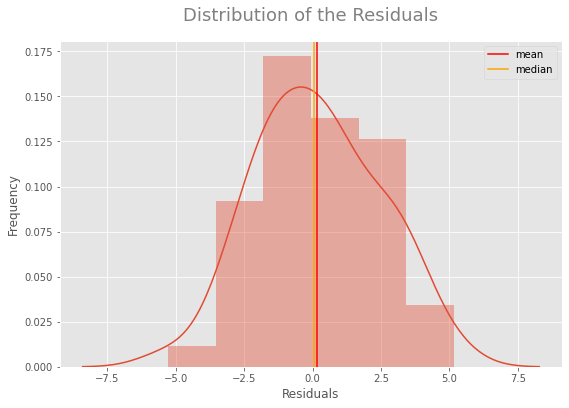

In [25]:
fig, ax = plt.subplots(figsize=(9, 6))

residuals = (y_test - y_pred)

sns.distplot(residuals.flatten(), ax=ax)
ax.axvline(x = np.mean(residuals), color='red', label='mean')
ax.axvline(x = np.median(residuals), color='orange', label='median')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the Residuals', pad=20, size=18, color='gray')
ax.legend(loc='upper right')
plt.savefig('img_output/scikit_distribution_of_the_residuals.png')

In [26]:
np.mean(residuals)

0.17668515912639543

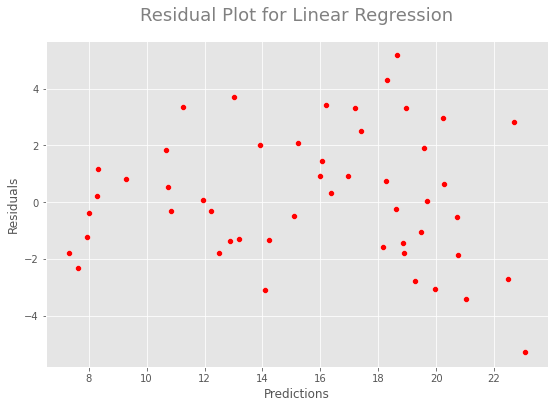

In [27]:
fig, ax = plt.subplots(figsize=(9, 6))

residuals = y_test - y_pred

sns.scatterplot(x = y_pred.flatten(), y = residuals.flatten(), ax=ax, color='red')

ax.set_title('Residual Plot for Linear Regression', pad=20, size=18, color='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Residuals')
plt.savefig('img_output/scikit_residual_plot.png')